In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df =  pd.read_csv("./Bus Charter Pricing Data for Ammar (with city data) 15_10_21 (1).csv")
df

,Trip Number,Purpose,Vehicle class,Trip type,Passengers,Date of enquiry,Leg 1 start date,Distance in kms,Travel time minutes,Total time elapsed(hours),Trip starts before 7 am,Trip ends after 6pm,Supplier id,Supplier Quote(including GST),Total google distance to the closest depot,Closest depot,Closest city id,Closest city Google distance(km)
0,#090520213,Wedding,Budget,One Way,35,05/09/2021,12/03/2022,23.183,21,0.35,No,Yes,317,431.25,29,694,426,24.3
1,#100120215,Other,Budget,Return,25,01/10/2021,23/10/2021,32.554,36,5.37,No,Yes,310,517.50,4,696,436,3.0
2,#092120217,Hen or Stag Do,Budget,Return,15,21/09/2021,30/10/2021,110.210,84,7.45,No,Yes,223,889.04,8,747,437,0.5
3,#070820216,Sports Game,Standard,Return,70,08/07/2021,24/10/2021,15.513,25,7.72,No,No,325,1518.00,10,742,455,4.5
4,#092120211,Corporate Event,Budget,Return,53,21/09/2021,17/12/2021,14.301,26,3.18,No,No,364,490.00,42,875,432,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,#112620203,Christmas Party,Standard,Return,30,26/11/2020,18/12/2020,20.852,23,7.43,No,Yes,315,530.00,4,722,438,1.1
449,#112520204,Other,Budget,Return,25,25/11/2020,27/11/2020,19.468,28,2.98,No,No,322,224.75,6,737,449,2.9
450,#112520204,Other,Budget,Return,25,25/11/2020,27/11/2020,19.468,28,2.98,No,No,311,500.00,4,703,449,2.9
451,#112220202,Club or Society,Standard,Return,45,22/11/2020,12/12/2020,115.055,103,9.85,No,Yes,192,985.00,88,772,426,11.9


In [3]:
df.drop(labels=['Trip Number','Leg 1 start date','Supplier id','Date of enquiry','Total google distance to the closest depot','Trip starts before 7 am','Trip ends after 6pm','Closest city Google distance(km)','Closest city id','Closest depot','Purpose'],axis=1,inplace=True)
df

,Vehicle class,Trip type,Passengers,Distance in kms,Travel time minutes,Total time elapsed(hours),Supplier Quote(including GST)
0,Budget,One Way,35,23.183,21,0.35,431.25
1,Budget,Return,25,32.554,36,5.37,517.50
2,Budget,Return,15,110.210,84,7.45,889.04
3,Standard,Return,70,15.513,25,7.72,1518.00
4,Budget,Return,53,14.301,26,3.18,490.00
...,...,...,...,...,...,...,...
448,Standard,Return,30,20.852,23,7.43,530.00
449,Budget,Return,25,19.468,28,2.98,224.75
450,Budget,Return,25,19.468,28,2.98,500.00
451,Standard,Return,45,115.055,103,9.85,985.00


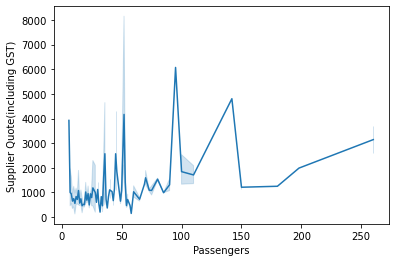

In [4]:
sns.lineplot(x=df['Passengers'],y=df['Supplier Quote(including GST)'])

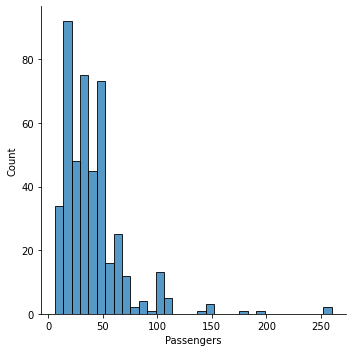

In [5]:
sns.displot(df['Passengers'])

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


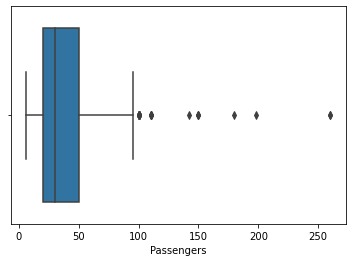

In [6]:
sns.boxplot(df['Passengers'])

In [7]:
# pd.cut(np.array(df['Passengers'].tolist()),4)

In [8]:
# df['Bus Type'] = pd.cut(np.array(df['Passengers'].tolist()),6,labels=["Small","Medium Small","Medium","Medium Large","Large","Extra Large"])

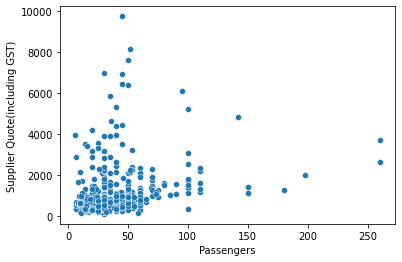

In [9]:
sns.scatterplot(x=df['Passengers'],y=df['Supplier Quote(including GST)'])

In [10]:
# Minibus - 0-11 passengers
# Large Minibus - 12-23 passengers
# Small Coach - 24-36 passengers
# Medium Coach - 37-44 passengers
# Large Coach - 45-49 passengers
# Extra Large Coach - 50-53 passengers

In [11]:
def get_number_of_bus_with_type(num_passengers):
    
    minibus = 0
    large_Minibus = 0
    small_coach = 0
    medium_coach = 0
    large_coach = 0
    extra_large_coach = 0
    
    while(num_passengers>0):
        if(num_passengers<=11):
            minibus = minibus + 1
            num_passengers = num_passengers - 11
        elif(num_passengers<=23):
            large_Minibus = large_Minibus + 1
            num_passengers = num_passengers - 23
        elif(num_passengers<=36):
            small_coach = small_coach + 1
            num_passengers = num_passengers - 36
        elif(num_passengers<=44):
            medium_coach = medium_coach + 1
            num_passengers = num_passengers - 44
        elif(num_passengers<=49):
            large_coach = large_coach + 1
            num_passengers = num_passengers - 49
        else:
            extra_large_coach = extra_large_coach + 1
            num_passengers = num_passengers -53
        
    return minibus,large_Minibus,small_coach,medium_coach,large_coach,extra_large_coach
       
        
            
            
            

In [12]:
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
for x in range(len(df)):
    num_passengers = df.iloc[x,2]
    minibus,large_Minibus,small_coach,medium_coach,large_coach,extra_large_coach = get_number_of_bus_with_type(num_passengers)
    a1.append(minibus)
    a2.append(large_Minibus)
    a3.append(small_coach)
    a4.append(medium_coach)
    a5.append(large_coach)
    a6.append(extra_large_coach)
    
    

    
    

In [13]:
df['Number of MiniBus'] = a1
df['Number of Large MiniBus'] = a2 
df['Number of Small Coach'] = a3
df['Number of Medium Coach'] = a4
df['Number of Large Coach'] = a5
df['Extra Large Coach'] = a6

In [14]:
df

,Vehicle class,Trip type,Passengers,Distance in kms,Travel time minutes,Total time elapsed(hours),Supplier Quote(including GST),Number of MiniBus,Number of Large MiniBus,Number of Small Coach,Number of Medium Coach,Number of Large Coach,Extra Large Coach
0,Budget,One Way,35,23.183,21,0.35,431.25,0,0,1,0,0,0
1,Budget,Return,25,32.554,36,5.37,517.50,0,0,1,0,0,0
2,Budget,Return,15,110.210,84,7.45,889.04,0,1,0,0,0,0
3,Standard,Return,70,15.513,25,7.72,1518.00,0,1,0,0,0,1
4,Budget,Return,53,14.301,26,3.18,490.00,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Standard,Return,30,20.852,23,7.43,530.00,0,0,1,0,0,0
449,Budget,Return,25,19.468,28,2.98,224.75,0,0,1,0,0,0
450,Budget,Return,25,19.468,28,2.98,500.00,0,0,1,0,0,0
451,Standard,Return,45,115.055,103,9.85,985.00,0,0,0,0,1,0


In [15]:
df.corr()

,Passengers,Distance in kms,Travel time minutes,Total time elapsed(hours),Supplier Quote(including GST),Number of MiniBus,Number of Large MiniBus,Number of Small Coach,Number of Medium Coach,Number of Large Coach,Extra Large Coach
Passengers,1.000000,-0.071627,-0.071728,-0.023303,0.238317,0.061037,-0.347048,-0.135544,0.152488,0.381946,0.883066
Distance in kms,-0.071627,1.000000,0.997584,0.057888,0.813655,-0.032063,-0.097710,0.046907,0.020342,0.087552,-0.104206
Travel time minutes,-0.071728,0.997584,1.000000,0.073132,0.808121,-0.029878,-0.096537,0.043402,0.022054,0.085459,-0.103336
Total time elapsed(hours),-0.023303,0.057888,0.073132,1.000000,0.080363,-0.007493,-0.051751,0.111709,-0.028803,-0.015911,-0.031452
Supplier Quote(including GST),0.238317,0.813655,0.808121,0.080363,1.000000,-0.038512,-0.166423,0.015352,0.014822,0.236908,0.166016
Number of MiniBus,0.061037,-0.032063,-0.029878,-0.007493,-0.038512,1.000000,-0.249886,-0.211414,-0.135247,-0.103546,0.228386
Number of Large MiniBus,-0.347048,-0.097710,-0.096537,-0.051751,-0.166423,-0.249886,1.000000,-0.374521,-0.239592,-0.183433,-0.262797
Number of Small Coach,-0.135544,0.046907,0.043402,0.111709,0.015352,-0.211414,-0.374521,1.000000,-0.202705,-0.155192,-0.286486
Number of Medium Coach,0.152488,0.020342,0.022054,-0.028803,0.014822,-0.135247,-0.239592,-0.202705,1.000000,-0.099280,-0.076052
Number of Large Coach,0.381946,0.087552,0.085459,-0.015911,0.236908,-0.103546,-0.183433,-0.155192,-0.099280,1.000000,0.140539


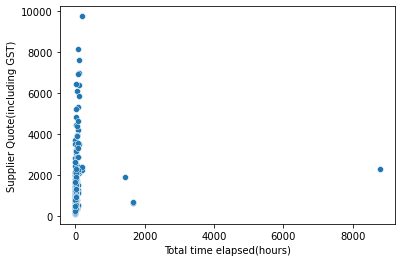

In [16]:
sns.scatterplot(x=df['Total time elapsed(hours)'],y=df['Supplier Quote(including GST)'])

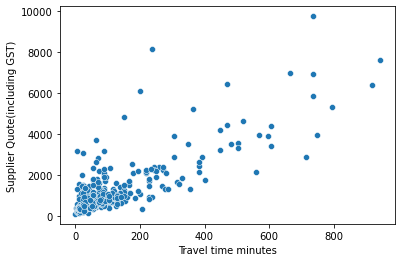

In [17]:
sns.scatterplot(x=df['Travel time minutes'],y=df['Supplier Quote(including GST)'])

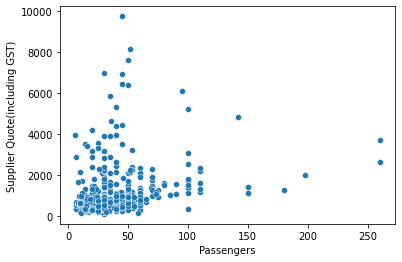

In [18]:
sns.scatterplot(x=df['Passengers'],y=df['Supplier Quote(including GST)'])

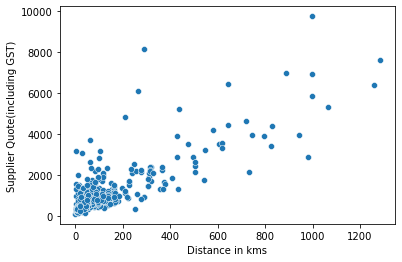

In [19]:
sns.scatterplot(x=df['Distance in kms'],y=df['Supplier Quote(including GST)'])

In [20]:
df['Vehicle class'].replace({'Budget':0,'Standard':0,'Luxury':1},inplace=True)

In [21]:
df['Vehicle class'].unique()

array([0, 1], dtype=int64)

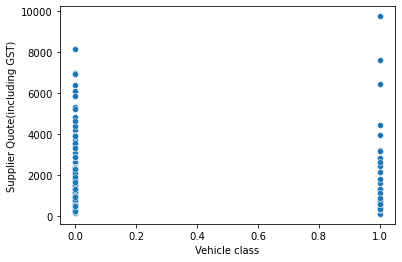

In [22]:
sns.scatterplot(x=df['Vehicle class'],y=df['Supplier Quote(including GST)'])

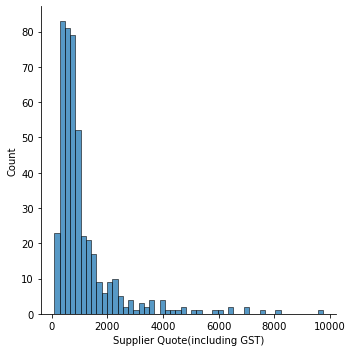

In [23]:
sns.displot(df['Supplier Quote(including GST)'])

In [24]:
df

,Vehicle class,Trip type,Passengers,Distance in kms,Travel time minutes,Total time elapsed(hours),Supplier Quote(including GST),Number of MiniBus,Number of Large MiniBus,Number of Small Coach,Number of Medium Coach,Number of Large Coach,Extra Large Coach
0,0,One Way,35,23.183,21,0.35,431.25,0,0,1,0,0,0
1,0,Return,25,32.554,36,5.37,517.50,0,0,1,0,0,0
2,0,Return,15,110.210,84,7.45,889.04,0,1,0,0,0,0
3,0,Return,70,15.513,25,7.72,1518.00,0,1,0,0,0,1
4,0,Return,53,14.301,26,3.18,490.00,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0,Return,30,20.852,23,7.43,530.00,0,0,1,0,0,0
449,0,Return,25,19.468,28,2.98,224.75,0,0,1,0,0,0
450,0,Return,25,19.468,28,2.98,500.00,0,0,1,0,0,0
451,0,Return,45,115.055,103,9.85,985.00,0,0,0,0,1,0


In [25]:
df['Trip type'].replace({'One Way':0,'Return':1},inplace=True)
df.to_csv("final_dataset.csv")

In [26]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

Using TensorFlow backend.


In [27]:
features = df.drop(labels=['Supplier Quote(including GST)'],axis=1)
target = df[['Supplier Quote(including GST)']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [28]:
X_train

,Vehicle class,Trip type,Passengers,Distance in kms,Travel time minutes,Total time elapsed(hours),Number of MiniBus,Number of Large MiniBus,Number of Small Coach,Number of Medium Coach,Number of Large Coach,Extra Large Coach
141,0,1,23,32.339,43,36.35,0,1,0,0,0,0
331,0,1,80,60.373,60,10.33,0,0,1,0,0,1
238,0,1,18,77.889,64,5.53,0,1,0,0,0,0
409,1,1,40,504.379,382,4.92,0,0,0,1,0,0
222,0,1,45,604.813,482,105.47,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,10,26.560,23,0.38,1,0,0,0,0,0
270,0,0,23,37.846,35,0.58,0,1,0,0,0,0
348,0,1,50,69.157,73,7.87,0,0,0,0,0,1
435,0,0,8,84.709,69,1.15,1,0,0,0,0,0


In [29]:
X_test

,Vehicle class,Trip type,Passengers,Distance in kms,Travel time minutes,Total time elapsed(hours),Number of MiniBus,Number of Large MiniBus,Number of Small Coach,Number of Medium Coach,Number of Large Coach,Extra Large Coach
352,0,1,50,13.033,29,2.73,0,0,0,0,0,1
39,0,1,30,163.288,142,14.18,0,0,1,0,0,0
361,0,1,22,308.040,227,14.93,0,1,0,0,0,0
358,1,1,150,20.416,23,7.18,0,0,0,1,0,2
154,0,0,12,7.664,13,0.22,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,0,0,40,30.519,27,0.45,0,0,0,1,0,0
354,0,1,20,167.325,128,6.80,0,1,0,0,0,0
173,0,0,58,13.705,12,0.20,1,0,0,0,0,1
175,0,1,50,31.033,30,4.00,0,0,0,0,0,1


In [30]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(150, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(30, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               25800     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 66,725
Trainable params: 66,725
Non-trainable params: 0
____________________________________________________

In [31]:
NN_model.fit(X_train,y_train, epochs=500, batch_size=32, validation_split = 0.2)


Epoch 1/500
8/8 [==============================] - 1s 80ms/step - loss: 1126.4005 - mean_absolute_error: 1126.4005 - val_loss: 1075.6948 - val_mean_absolute_error: 1075.6948
Epoch 2/500
8/8 [==============================] - 0s 11ms/step - loss: 1191.4473 - mean_absolute_error: 1191.4473 - val_loss: 1070.4464 - val_mean_absolute_error: 1070.4464
Epoch 3/500
8/8 [==============================] - 0s 21ms/step - loss: 1162.5468 - mean_absolute_error: 1162.5468 - val_loss: 1043.4072 - val_mean_absolute_error: 1043.4072
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 1222.6846 - mean_absolute_error: 1222.6846 - val_loss: 923.2191 - val_mean_absolute_error: 923.2191
Epoch 5/500
8/8 [==============================] - 0s 10ms/step - loss: 904.3046 - mean_absolute_error: 904.3046 - val_loss: 576.4191 - val_mean_absolute_error: 576.4191
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 511.3727 - mean_absolute_error: 511.3727 - val_loss: 478.3149 - 

8/8 [==============================] - 0s 10ms/step - loss: 303.4900 - mean_absolute_error: 303.4900 - val_loss: 274.3107 - val_mean_absolute_error: 274.3107
Epoch 50/500
8/8 [==============================] - 0s 9ms/step - loss: 338.6251 - mean_absolute_error: 338.6251 - val_loss: 267.0500 - val_mean_absolute_error: 267.0500
Epoch 51/500
8/8 [==============================] - 0s 10ms/step - loss: 277.2712 - mean_absolute_error: 277.2712 - val_loss: 278.1649 - val_mean_absolute_error: 278.1649
Epoch 52/500
8/8 [==============================] - 0s 9ms/step - loss: 288.0966 - mean_absolute_error: 288.0966 - val_loss: 272.8562 - val_mean_absolute_error: 272.8562
Epoch 53/500
8/8 [==============================] - 0s 9ms/step - loss: 343.2979 - mean_absolute_error: 343.2979 - val_loss: 269.0036 - val_mean_absolute_error: 269.0036
Epoch 54/500
8/8 [==============================] - 0s 9ms/step - loss: 314.5723 - mean_absolute_error: 314.5723 - val_loss: 270.3481 - val_mean_absolute_error: 

8/8 [==============================] - 0s 9ms/step - loss: 299.5577 - mean_absolute_error: 299.5577 - val_loss: 273.8793 - val_mean_absolute_error: 273.8793
Epoch 98/500
8/8 [==============================] - 0s 9ms/step - loss: 290.0814 - mean_absolute_error: 290.0814 - val_loss: 280.5477 - val_mean_absolute_error: 280.5477
Epoch 99/500
8/8 [==============================] - 0s 9ms/step - loss: 298.5992 - mean_absolute_error: 298.5992 - val_loss: 269.9263 - val_mean_absolute_error: 269.9263
Epoch 100/500
8/8 [==============================] - 0s 9ms/step - loss: 278.9241 - mean_absolute_error: 278.9241 - val_loss: 281.7210 - val_mean_absolute_error: 281.7210
Epoch 101/500
8/8 [==============================] - 0s 9ms/step - loss: 270.0486 - mean_absolute_error: 270.0486 - val_loss: 282.4809 - val_mean_absolute_error: 282.4809
Epoch 102/500
8/8 [==============================] - 0s 9ms/step - loss: 293.2025 - mean_absolute_error: 293.2025 - val_loss: 292.1958 - val_mean_absolute_error:

Epoch 145/500
8/8 [==============================] - 0s 9ms/step - loss: 270.4499 - mean_absolute_error: 270.4499 - val_loss: 267.3463 - val_mean_absolute_error: 267.3463
Epoch 146/500
8/8 [==============================] - 0s 9ms/step - loss: 260.0741 - mean_absolute_error: 260.0741 - val_loss: 270.9730 - val_mean_absolute_error: 270.9730
Epoch 147/500
8/8 [==============================] - 0s 9ms/step - loss: 256.7423 - mean_absolute_error: 256.7423 - val_loss: 277.1646 - val_mean_absolute_error: 277.1646
Epoch 148/500
8/8 [==============================] - 0s 8ms/step - loss: 293.2015 - mean_absolute_error: 293.2015 - val_loss: 271.8126 - val_mean_absolute_error: 271.8126
Epoch 149/500
8/8 [==============================] - 0s 9ms/step - loss: 297.5593 - mean_absolute_error: 297.5593 - val_loss: 269.6041 - val_mean_absolute_error: 269.6041
Epoch 150/500
8/8 [==============================] - 0s 9ms/step - loss: 247.8621 - mean_absolute_error: 247.8621 - val_loss: 271.5463 - val_mean

Epoch 193/500
8/8 [==============================] - 0s 9ms/step - loss: 280.8571 - mean_absolute_error: 280.8571 - val_loss: 274.7069 - val_mean_absolute_error: 274.7069
Epoch 194/500
8/8 [==============================] - 0s 9ms/step - loss: 261.9223 - mean_absolute_error: 261.9223 - val_loss: 272.1428 - val_mean_absolute_error: 272.1428
Epoch 195/500
8/8 [==============================] - 0s 8ms/step - loss: 278.3831 - mean_absolute_error: 278.3831 - val_loss: 274.7183 - val_mean_absolute_error: 274.7183
Epoch 196/500
8/8 [==============================] - 0s 9ms/step - loss: 289.3558 - mean_absolute_error: 289.3558 - val_loss: 264.1568 - val_mean_absolute_error: 264.1568
Epoch 197/500
8/8 [==============================] - 0s 9ms/step - loss: 260.8127 - mean_absolute_error: 260.8127 - val_loss: 272.0712 - val_mean_absolute_error: 272.0712
Epoch 198/500
8/8 [==============================] - 0s 9ms/step - loss: 259.7991 - mean_absolute_error: 259.7991 - val_loss: 272.8938 - val_mean

Epoch 241/500
8/8 [==============================] - 0s 9ms/step - loss: 249.1579 - mean_absolute_error: 249.1579 - val_loss: 267.2792 - val_mean_absolute_error: 267.2792
Epoch 242/500
8/8 [==============================] - 0s 10ms/step - loss: 259.4327 - mean_absolute_error: 259.4327 - val_loss: 268.6720 - val_mean_absolute_error: 268.6720
Epoch 243/500
8/8 [==============================] - 0s 9ms/step - loss: 268.0555 - mean_absolute_error: 268.0555 - val_loss: 269.1802 - val_mean_absolute_error: 269.1802
Epoch 244/500
8/8 [==============================] - 0s 9ms/step - loss: 245.1578 - mean_absolute_error: 245.1578 - val_loss: 269.2395 - val_mean_absolute_error: 269.2395
Epoch 245/500
8/8 [==============================] - 0s 9ms/step - loss: 268.9035 - mean_absolute_error: 268.9035 - val_loss: 266.8701 - val_mean_absolute_error: 266.8701
Epoch 246/500
8/8 [==============================] - 0s 9ms/step - loss: 248.0438 - mean_absolute_error: 248.0438 - val_loss: 268.7188 - val_mea

Epoch 289/500
8/8 [==============================] - 0s 22ms/step - loss: 265.4784 - mean_absolute_error: 265.4784 - val_loss: 271.3290 - val_mean_absolute_error: 271.3290
Epoch 290/500
8/8 [==============================] - 0s 9ms/step - loss: 240.1802 - mean_absolute_error: 240.1802 - val_loss: 268.8962 - val_mean_absolute_error: 268.8962
Epoch 291/500
8/8 [==============================] - 0s 9ms/step - loss: 306.5343 - mean_absolute_error: 306.5343 - val_loss: 269.1167 - val_mean_absolute_error: 269.1167
Epoch 292/500
8/8 [==============================] - 0s 9ms/step - loss: 287.8747 - mean_absolute_error: 287.8747 - val_loss: 268.1374 - val_mean_absolute_error: 268.1374
Epoch 293/500
8/8 [==============================] - 0s 8ms/step - loss: 289.5127 - mean_absolute_error: 289.5127 - val_loss: 263.4076 - val_mean_absolute_error: 263.4076
Epoch 294/500
8/8 [==============================] - 0s 9ms/step - loss: 272.4409 - mean_absolute_error: 272.4409 - val_loss: 269.2781 - val_mea

Epoch 337/500
8/8 [==============================] - 0s 9ms/step - loss: 276.3644 - mean_absolute_error: 276.3644 - val_loss: 269.7144 - val_mean_absolute_error: 269.7144
Epoch 338/500
8/8 [==============================] - 0s 9ms/step - loss: 275.3963 - mean_absolute_error: 275.3963 - val_loss: 267.5883 - val_mean_absolute_error: 267.5883
Epoch 339/500
8/8 [==============================] - 0s 9ms/step - loss: 227.1385 - mean_absolute_error: 227.1385 - val_loss: 266.9713 - val_mean_absolute_error: 266.9713
Epoch 340/500
8/8 [==============================] - 0s 10ms/step - loss: 267.7014 - mean_absolute_error: 267.7014 - val_loss: 269.4132 - val_mean_absolute_error: 269.4132
Epoch 341/500
8/8 [==============================] - 0s 10ms/step - loss: 294.5432 - mean_absolute_error: 294.5432 - val_loss: 272.5093 - val_mean_absolute_error: 272.5093
Epoch 342/500
8/8 [==============================] - 0s 9ms/step - loss: 244.9820 - mean_absolute_error: 244.9820 - val_loss: 273.9768 - val_me

Epoch 385/500
8/8 [==============================] - 0s 9ms/step - loss: 269.9509 - mean_absolute_error: 269.9509 - val_loss: 263.4309 - val_mean_absolute_error: 263.4309
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 248.5366 - mean_absolute_error: 248.5366 - val_loss: 267.3332 - val_mean_absolute_error: 267.3332
Epoch 387/500
8/8 [==============================] - 0s 9ms/step - loss: 252.7197 - mean_absolute_error: 252.7197 - val_loss: 267.9177 - val_mean_absolute_error: 267.9177
Epoch 388/500
8/8 [==============================] - 0s 9ms/step - loss: 289.4955 - mean_absolute_error: 289.4955 - val_loss: 267.7519 - val_mean_absolute_error: 267.7519
Epoch 389/500
8/8 [==============================] - 0s 8ms/step - loss: 282.9860 - mean_absolute_error: 282.9860 - val_loss: 270.7897 - val_mean_absolute_error: 270.7897
Epoch 390/500
8/8 [==============================] - 0s 9ms/step - loss: 271.1271 - mean_absolute_error: 271.1271 - val_loss: 261.6977 - val_mea

Epoch 433/500
8/8 [==============================] - 0s 9ms/step - loss: 260.4909 - mean_absolute_error: 260.4909 - val_loss: 267.3537 - val_mean_absolute_error: 267.3537
Epoch 434/500
8/8 [==============================] - 0s 9ms/step - loss: 297.0454 - mean_absolute_error: 297.0454 - val_loss: 259.3169 - val_mean_absolute_error: 259.3169
Epoch 435/500
8/8 [==============================] - 0s 9ms/step - loss: 237.5215 - mean_absolute_error: 237.5215 - val_loss: 256.4642 - val_mean_absolute_error: 256.4642
Epoch 436/500
8/8 [==============================] - 0s 9ms/step - loss: 262.1210 - mean_absolute_error: 262.1210 - val_loss: 257.9588 - val_mean_absolute_error: 257.9588
Epoch 437/500
8/8 [==============================] - 0s 8ms/step - loss: 243.2130 - mean_absolute_error: 243.2130 - val_loss: 259.6359 - val_mean_absolute_error: 259.6359
Epoch 438/500
8/8 [==============================] - 0s 9ms/step - loss: 239.6341 - mean_absolute_error: 239.6341 - val_loss: 258.9329 - val_mean

Epoch 481/500
8/8 [==============================] - 0s 12ms/step - loss: 210.3070 - mean_absolute_error: 210.3070 - val_loss: 262.3349 - val_mean_absolute_error: 262.3349
Epoch 482/500
8/8 [==============================] - 0s 10ms/step - loss: 277.3130 - mean_absolute_error: 277.3130 - val_loss: 283.3553 - val_mean_absolute_error: 283.3553
Epoch 483/500
8/8 [==============================] - 0s 10ms/step - loss: 268.4146 - mean_absolute_error: 268.4146 - val_loss: 263.2976 - val_mean_absolute_error: 263.2976
Epoch 484/500
8/8 [==============================] - 0s 10ms/step - loss: 318.5065 - mean_absolute_error: 318.5065 - val_loss: 253.2889 - val_mean_absolute_error: 253.2889
Epoch 485/500
8/8 [==============================] - 0s 13ms/step - loss: 250.3565 - mean_absolute_error: 250.3565 - val_loss: 255.3773 - val_mean_absolute_error: 255.3773
Epoch 486/500
8/8 [==============================] - 0s 12ms/step - loss: 242.2926 - mean_absolute_error: 242.2926 - val_loss: 254.2172 - va

In [32]:
predictions = NN_model.predict(X_test)
y_preds = []
for x in predictions:
    y_preds.append(x[0])

In [33]:
y_test['Supplier Quote(including GST)'].tolist()

[400.0,
 1009.7,
 1456.0,
 1125.0,
 333.5,
 345.0,
 630.0,
 488.75,
 1350.0,
 550.0,
 3065.555,
 262.0,
 803.0,
 729.1,
 1290.3,
 2396.6,
 320.0,
 500.0,
 431.25,
 800.0,
 1160.0,
 1351.25,
 300.0,
 631.93,
 9743.95,
 910.0,
 320.0,
 767.0,
 744.13,
 325.0,
 632.5,
 632.0,
 1035.0,
 7601.5,
 747.5,
 200.0,
 900.0,
 327.75,
 402.5,
 525.0,
 535.46,
 350.0,
 1075.0,
 90.0,
 650.0,
 563.5,
 2811.75,
 799.25,
 2612.0,
 3154.45,
 1417.95,
 909.65,
 700.0,
 813.05,
 1150.0,
 1145.0,
 437.0,
 1120.0,
 980.0,
 385.0,
 535.9,
 431.25,
 500.0,
 385.0,
 561.78,
 345.0,
 2880.75,
 281.75,
 253.0,
 6417.0,
 3894.48,
 399.0,
 1550.0,
 1576.0,
 2237.0,
 320.0,
 790.0,
 2869.25,
 325.0,
 584.2,
 267.95,
 535.9,
 1130.0,
 6074.3,
 727.95,
 1100.0,
 530.0,
 451.0,
 483.0,
 1058.0,
 931.5,
 906.0,
 240.0,
 1389.2,
 727.0,
 950.0,
 600.0,
 454.25,
 855.0,
 1990.0,
 600.0,
 600.53,
 419.75,
 400.0,
 405.95,
 747.5,
 1075.25,
 345.0,
 802.0,
 634.8,
 1020.0,
 1750.0,
 497.0,
 644.0,
 203.0,
 586.5,
 1458.2,

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)

481962.1810687866

In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0,n_estimators=120)

In [36]:
regr.fit(X_train, y_train)

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=120, random_state=0)

In [37]:
y_preds = regr.predict(X_test)

In [38]:
mean_squared_error(y_test,y_preds)

468566.03125475853

In [39]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


In [40]:
x_train_scaled = min_max_scaler.fit_transform(X_train)
x_train_scaled

array([[0.        , 1.        , 0.06692913, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.29133858, ..., 0.        , 0.        ,
        0.25      ],
       [0.        , 1.        , 0.04724409, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.17322835, ..., 0.        , 0.        ,
        0.25      ],
       [0.        , 0.        , 0.00787402, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.19291339, ..., 0.        , 0.        ,
        0.25      ]])

In [41]:
x_test_scaled = min_max_scaler.fit_transform(X_test)
x_test_scaled

array([[0.        , 1.        , 0.22513089, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 1.        , 0.12041885, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.07853403, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.26701571, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 1.        , 0.22513089, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 1.        , 0.17277487, ..., 1.        , 0.        ,
        0.        ]])

In [42]:
regr = RandomForestRegressor()
regr.fit(x_train_scaled,y_train)

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [43]:
mean_squared_error(y_test,regr.predict(x_test_scaled))

700829.0041329907

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)



In [45]:
X_poly

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [46]:
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [47]:
test_cases = poly.fit(X_test)
test_cases

PolynomialFeatures(degree=3)

In [48]:
# data = dataset.values
# # separate into input and output columns
# X, y = data[:, :-1], data[:, -1]
# # ensure inputs are floats and output is an integer label
# X = X.astype('float32')
# y = LabelEncoder().fit_transform(y.astype('str'))
# # define the pipeline
# trans = PolynomialFeatures(degree=3)
# model = KNeighborsClassifier()
# pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# # evaluate the pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report pipeline performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))